# Introduction


The objective of this project is to build a classifier to predict whether it will rain tomorrow based on today's data. I have used the following classifiers and compared their accuracies:

1. K nearest neighbors
2. Decision Trees
3. Logistic Regression
4. Support vector machines

# Data Source


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



In [152]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [153]:
df = pd.read_csv("/kaggle/input/rain-data/Rain prediction data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Exploration

In [154]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


#### Histogram plot for numeric variables

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

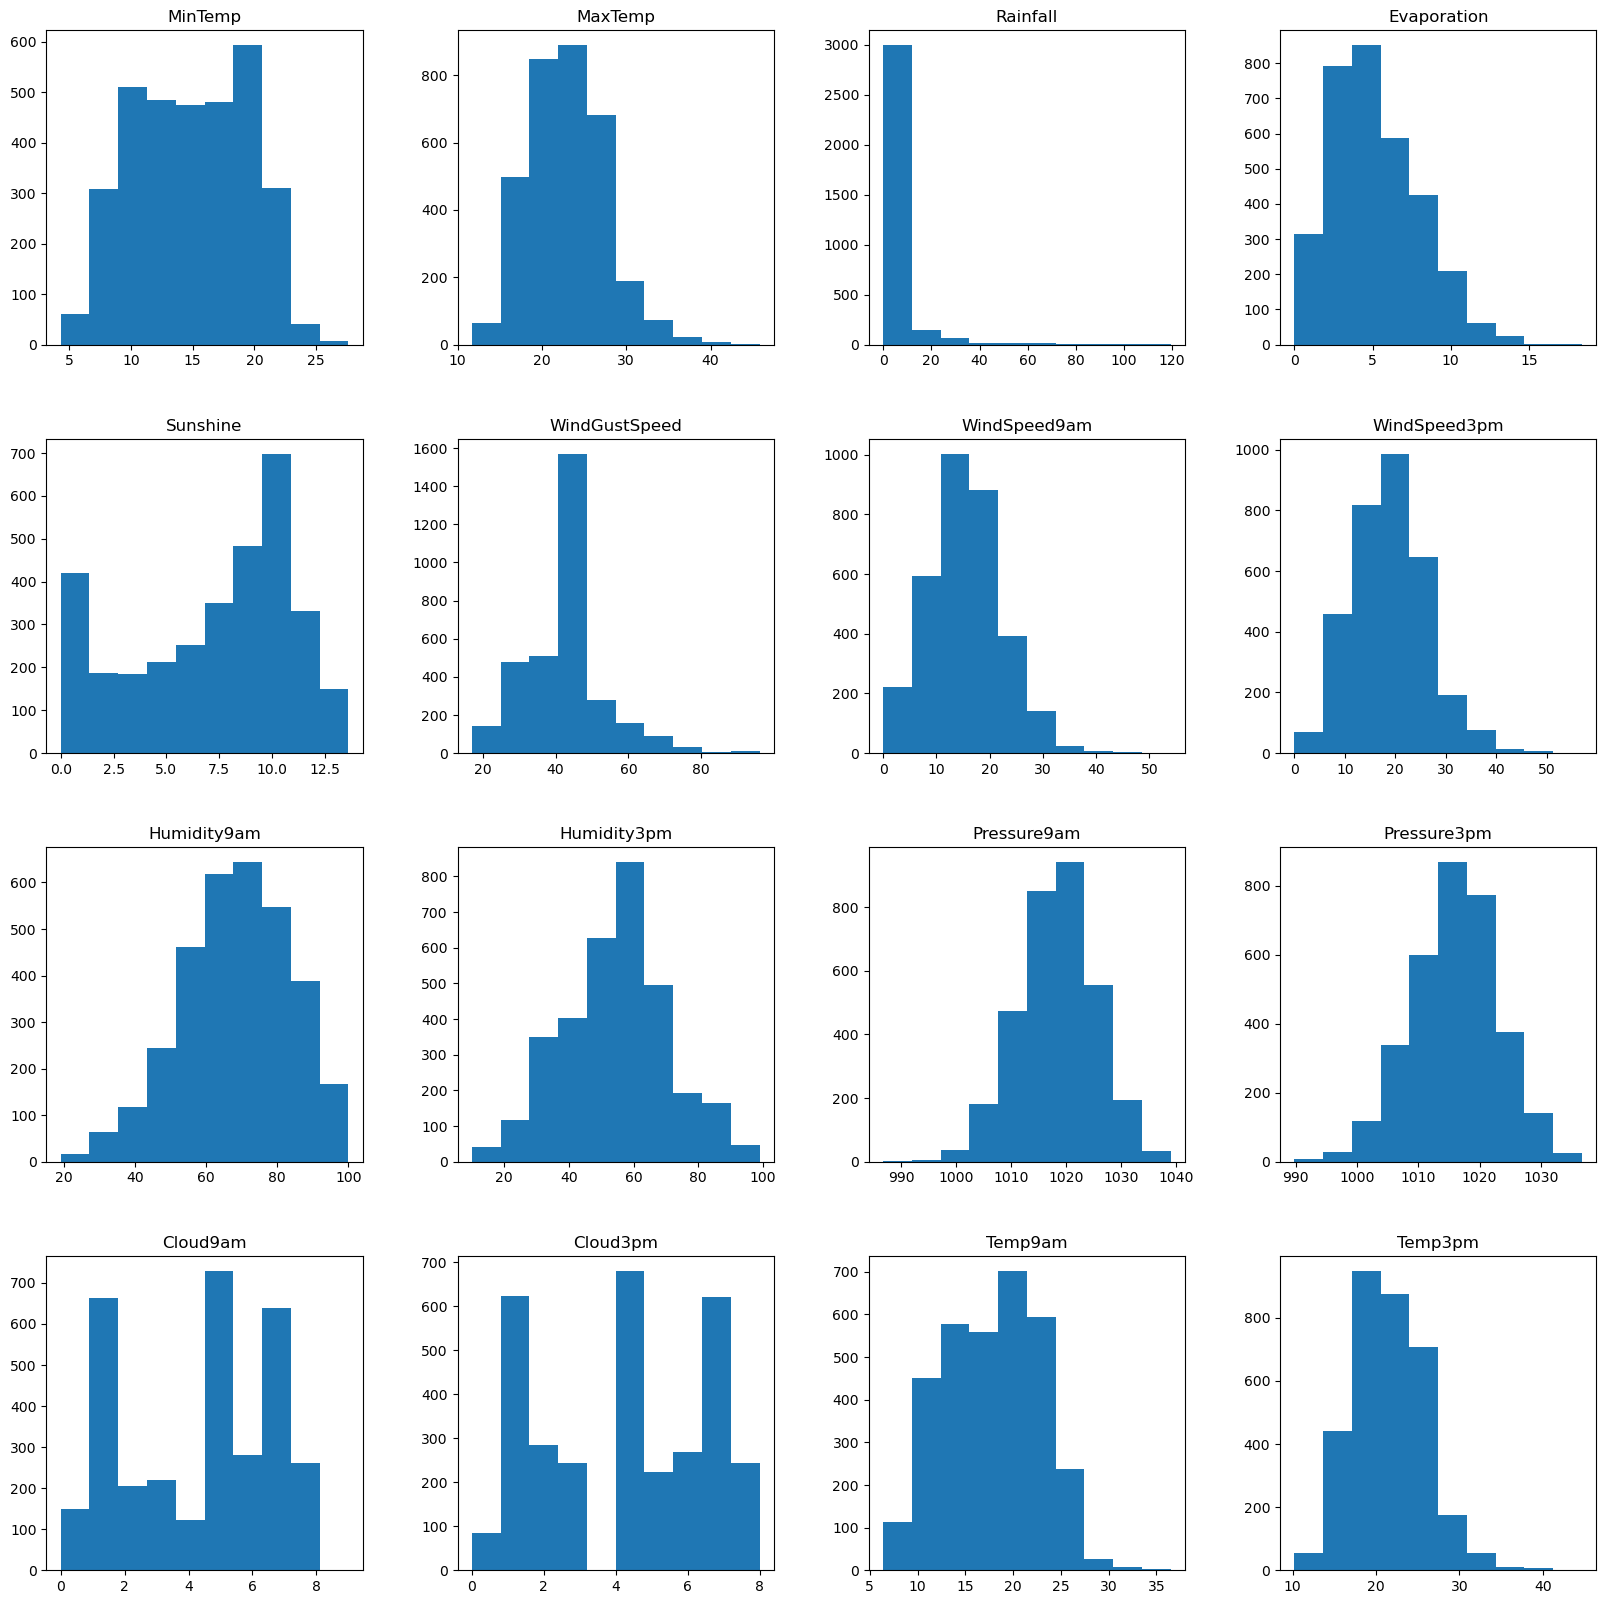

In [155]:
df.hist(figsize=(20,20),grid=False)

**As we can see, the majority of days have 0 rainfall. The distribution for most other variables resemble a normal curve**

### Data Cleaning and Processing


In [156]:
df.replace(['No', 'Yes'], [0,1], inplace=True)

/tmp/ipykernel_32/1171115091.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), annot=True)


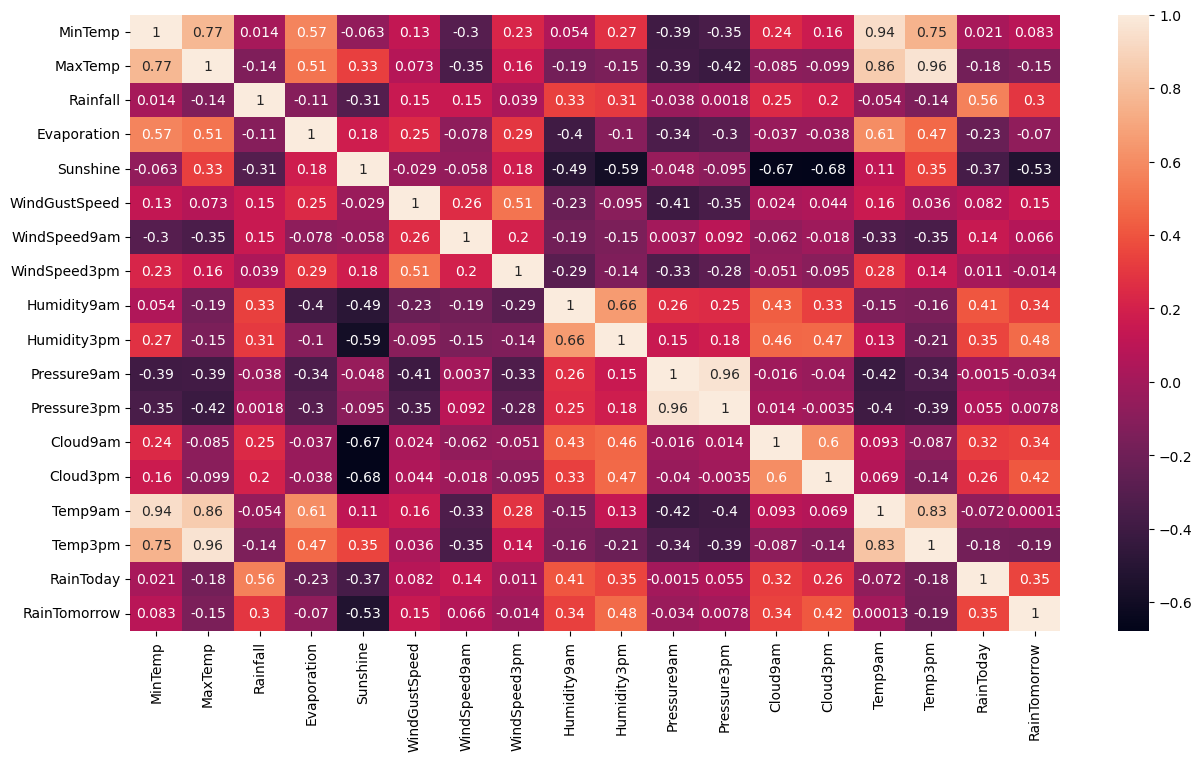

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(df.corr(), annot=True)

plt.show()


Plotting the correlation matrix shows us the key variables in determining rain tomorrow. 

- Humidity and clouds at 3pm have a positive relationship with rain tomorrow.
- Sunshine today has a highly negative relationship with rain tomorrow.

#### One Hot Encoding

Converting categorical variables to individual fields using one hot encoding

In [158]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [159]:
df_sydney_processed.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainToday_0', 'RainToday_1',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_

In [160]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Assigning the feature variables and the target variable


In [161]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [162]:
df_sydney_processed = df_sydney_processed.astype(float)

In [163]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [164]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### K Nearest Neighbors


In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [167]:
predictions = KNN.predict(x_test)

In [168]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test,predictions) 
KNN_JaccardIndex = metrics.jaccard_score(y_test,predictions)
KNN_F1_Score = metrics.f1_score(y_test,predictions) 

In [169]:
print ('Accuracy Score is ', KNN_Accuracy_Score)
print ('Jaccard Index is ', KNN_JaccardIndex)
print ('F1 score is ', KNN_F1_Score)

Accuracy Score is  0.8122137404580153
Jaccard Index is  0.39408866995073893
F1 score is  0.5653710247349824


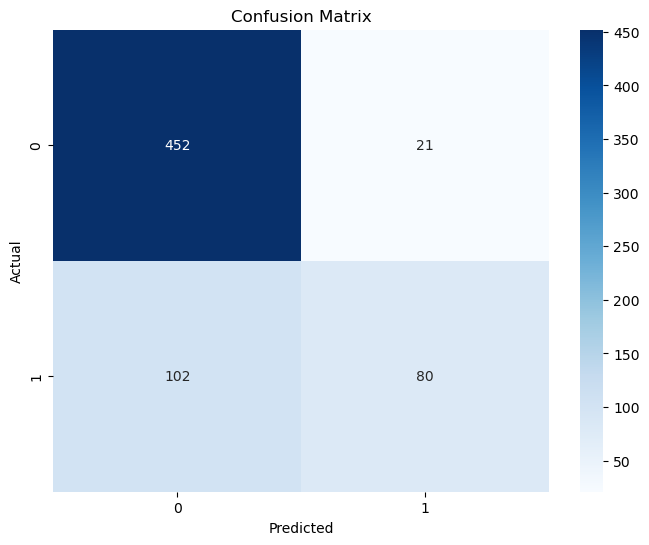

In [170]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**The model does well to predict rain tomorrow. The majority of errors come as false negatives**

### Decision Tree


In [171]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [172]:
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [173]:
predictions = Tree.predict(x_test)

In [174]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test,predictions) 
Tree_JaccardIndex = metrics.jaccard_score(y_test,predictions)
Tree_F1_Score = metrics.f1_score(y_test,predictions) 

In [175]:
print ('Accuracy Score is ', Tree_Accuracy_Score)
print ('Jaccard Index is ', Tree_JaccardIndex)
print ('F1 score is ', Tree_F1_Score)

Accuracy Score is  0.8045801526717558
Jaccard Index is  0.3786407766990291
F1 score is  0.5492957746478873


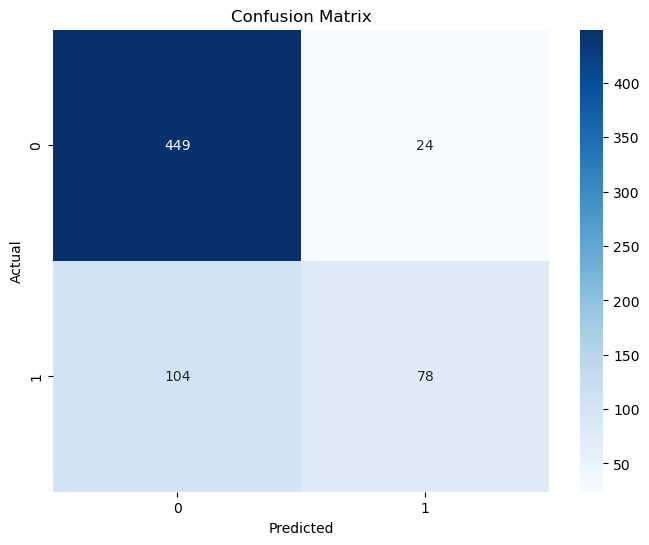

In [176]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**Once again, the decision tree captures the days with no rain with a high accuracy, but predicts false negatives frequently**

### Logistic Regression


In [177]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [178]:
predictions = LR.predict(x_test)


In [179]:
predict_proba = LR.predict_proba(x_test)
predict_proba

array([[0.74574813, 0.25425187],
       [0.97506424, 0.02493576],
       [0.50824637, 0.49175363],
       ...,
       [0.98014873, 0.01985127],
       [0.70131324, 0.29868676],
       [0.22307435, 0.77692565]])

In [180]:
LR_Accuracy_Score = metrics.accuracy_score(y_test,predictions) 
LR_JaccardIndex = metrics.jaccard_score(y_test,predictions)
LR_F1_Score = metrics.f1_score(y_test,predictions)
LR_Log_Loss = metrics.log_loss(y_test,predict_proba)

In [181]:
print ('Accuracy Score is ', LR_Accuracy_Score)
print ('Jaccard Index is ', LR_JaccardIndex)
print ('F1 score is ', LR_F1_Score)
print ('Log Loss is ', LR_Log_Loss)


Accuracy Score is  0.8366412213740458
Jaccard Index is  0.5091743119266054
F1 score is  0.6747720364741641
Log Loss is  0.3812590636097066


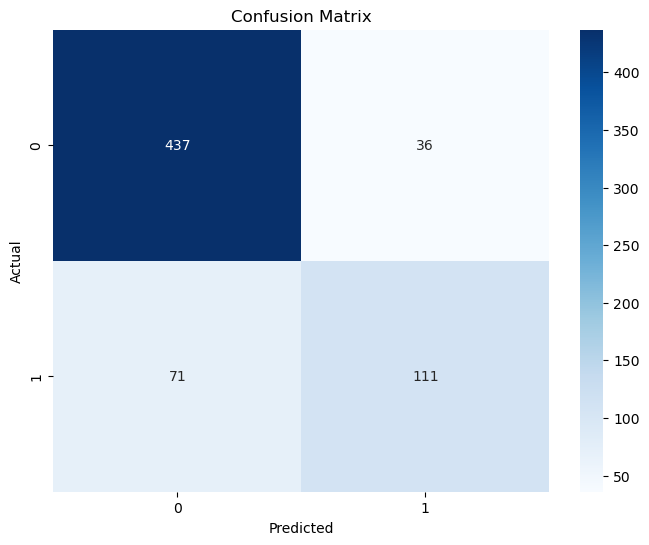

In [182]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**The logistic regression model does much better in terms of accuracy, with far fewer false negatives**

### Support Vector Machines


In [183]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,random_state=1)
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train,y_train)

SVC()

In [184]:
predictions = SVM.predict(x_test)

In [185]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test,predictions) 
SVM_JaccardIndex = metrics.jaccard_score(y_test,predictions)
SVM_F1_Score = metrics.f1_score(y_test,predictions) 

In [186]:
print ('Accuracy Score is ', SVM_Accuracy_Score)
print ('Jaccard Index is ', SVM_JaccardIndex)
print ('F1 score is ', SVM_F1_Score)

Accuracy Score is  0.7221374045801526
Jaccard Index is  0.0
F1 score is  0.0


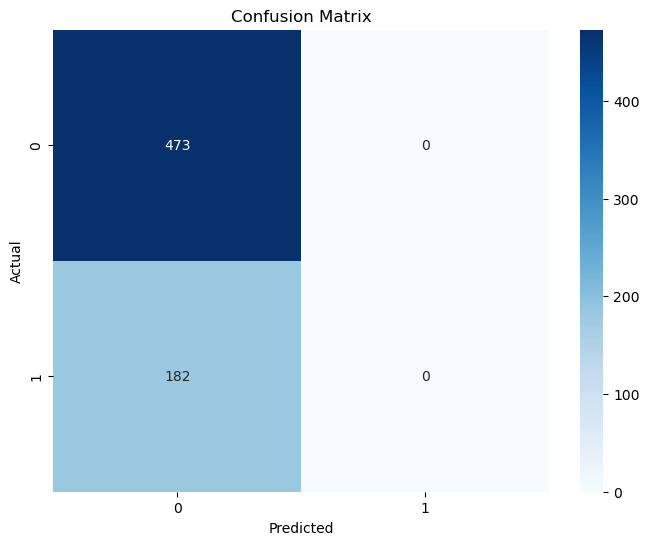

In [187]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**The SVM model performs the worst as it favours a prediction of no rain throughout being the majority of actual observations**

### Summary


In [188]:
classifiers = ['Decision Tree', 'Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbors']
scores = [
    [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, 'NA'],
    [LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss],
    [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score, 'NA'],
    [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score, 'NA']
]

report = pd.DataFrame(scores, index=classifiers, columns=['Accuracy score', 'Jaccard Index', 'F1 Score', 'Log Loss'])
report

,Accuracy score,Jaccard Index,F1 Score,Log Loss
Decision Tree,0.804580,0.378641,0.549296,NA
Logistic Regression,0.836641,0.509174,0.674772,0.381259
Support Vector Machine,0.722137,0.000000,0.000000,NA
K Nearest Neighbors,0.812214,0.394089,0.565371,NA


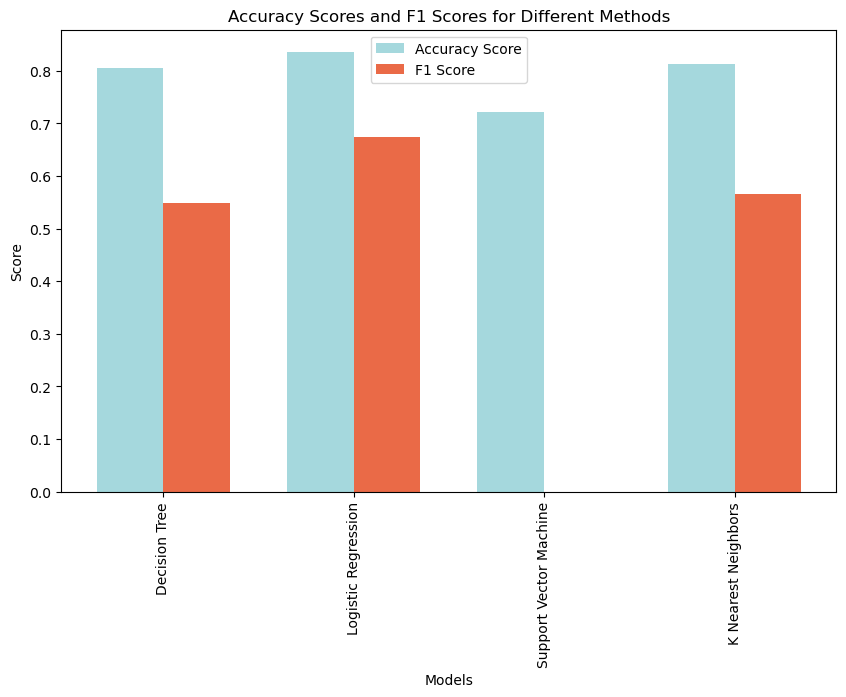

In [189]:
accuracy_scores=report['Accuracy score']
f1_scores=report['F1 Score']
bar_width = 0.35
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_scores, color='#A5D8DD', width=bar_width, label='Accuracy Score')
plt.bar(r2, f1_scores, color='#EA6A47', width=bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy Scores and F1 Scores for Different Methods')

plt.xticks([r + bar_width/2 for r in range(len(classifiers))], classifiers, rotation='vertical')
plt.legend()
plt.show()

## Conclusion

The analysis of the dataset revealed that various weather variables were influential in predicting the occurrence of rain tomorrow. Among these variables, sunshine, humidity, and cloud cover exhibited the strongest relationships with rain. 

The Logistic regression model demonstrated superior performance, achieving an accuracy score of 84% in accurately predicting rainfall. However, it is worth noting that the Decision tree and KNN models, although achieving moderate accuracy scores of 81% and 80% respectively, exhibited a higher frequency of false negative predictions.

These findings emphasize the importance of considering weather factors such as sunshine, humidity, and cloud cover when predicting rain and highlight the effectiveness of the Logistic regression model for this particular dataset.
